reading the file

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv("train (1).csv",skipinitialspace=True)

In [ ]:
df.head()


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


10 features and 1 target variable

target variable is given so it is a supervised learning problem

Target variavle contains the yes/no so its a classification probelm statement (binary)

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

no null values

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(45205, 11)

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


<AxesSubplot:>

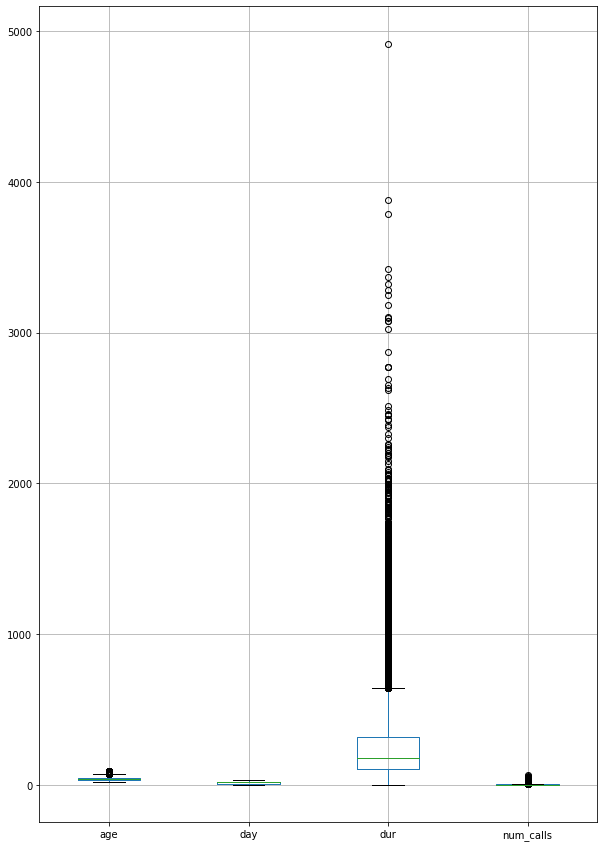

In [ ]:
df.boxplot(column=['age','day','dur','num_calls'],figsize=(10,15))

Thus age,day,dur,num_calls having outliers so we need to remove because it may create a problems.

# Handling the outlier

**Age**

In [ ]:
iqr=df['age'].quantile(0.75)-df['age'].quantile(0.25)
# print(iqr)
upper_thereshold=df['age'].quantile(0.75)+(1.5*iqr)
lower_thereshold=df['age'].quantile(0.25)-(1.5*iqr)

print(lower_thereshold,upper_thereshold)

10.5 70.5


we have outlier in the age column so we need to clip it by lower and upper thershold

In [ ]:
# df.age=df.age.clip(10.5,70.5)

age column is clipped

**Day**

In [ ]:
iqr=df['day'].quantile(0.75)-df['day'].quantile(0.25)
# print(iqr)
upper_thereshold=df['day'].quantile(0.75)+(1.5*iqr)
lower_thereshold=df['day'].quantile(0.25)-(1.5*iqr)

print(lower_thereshold,upper_thereshold)

-11.5 40.5


dont have any outlier in day column

**dur**

In [ ]:
iqr=df['dur'].quantile(0.75)-df['dur'].quantile(0.25)
# print(iqr)
upper_thereshold=df['dur'].quantile(0.75)+(1.5*iqr)
lower_thereshold=df['dur'].quantile(0.25)-(1.5*iqr)

print(lower_thereshold,upper_thereshold)

-221.0 643.0


having outlier in dur column

In [ ]:
df.dur=df.dur.clip(-221.0,643.0)

dur column is clipped with upper and lower threshold

**num_calls**

In [ ]:
iqr=df['num_calls'].quantile(0.75)-df['num_calls'].quantile(0.25)
# print(iqr)
upper_thereshold=df['num_calls'].quantile(0.75)+(1.5*iqr)
lower_thereshold=df['num_calls'].quantile(0.25)-(1.5*iqr)

print(lower_thereshold,upper_thereshold)

-2.0 6.0


In [ ]:
df.num_calls=df.num_calls.clip(-2.0,6.0)

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.937087,15.80688,234.95620,2.392235
std,10.619130,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,95.000000,31.00000,643.00000,6.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45205 non-null  int64  
 1   job             45205 non-null  object 
 2   marital         45205 non-null  object 
 3   education_qual  45205 non-null  object 
 4   call_type       45205 non-null  object 
 5   day             45205 non-null  int64  
 6   mon             45205 non-null  object 
 7   dur             45205 non-null  float64
 8   num_calls       45205 non-null  float64
 9   prev_outcome    45205 non-null  object 
 10  y               45205 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.1+ MB


In [ ]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92.0,1.0,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198.0,1.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,643.0,3.0,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456.0,2.0,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,643.0,5.0,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508.0,4.0,unknown,no


In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education_qual     object
call_type          object
day                 int64
mon                object
dur               float64
num_calls         float64
prev_outcome       object
y                  object
dtype: object

if any unknown values we need to fill

unknown is less we can go with mode.

In [ ]:
df["job"].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df["job"]=df["job"].replace("unknown",np.nan)

In [ ]:
df["education_qual"].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
df["education_qual"]=df["education_qual"].replace("unknown",np.nan)

In [ ]:
df["call_type"].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

no use in impututation the unknown value  in call_type

In [ ]:
df["mon"].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

no unknown value

In [ ]:
df["prev_outcome"].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
df.isnull().sum()

age                  0
job                288
marital              0
education_qual    1857
call_type            0
day                  0
mon                  0
dur                  0
num_calls            0
prev_outcome         0
y                    0
dtype: int64

In [ ]:
df["education_qual"]=df["education_qual"].fillna("secondary")

In [ ]:
df["education_qual"].value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [ ]:
df["job"]=df["job"].fillna("blue-collar")

In [ ]:
df["job"].value_counts()


blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

# Target column

encoding

In [ ]:
df["y"].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

[]

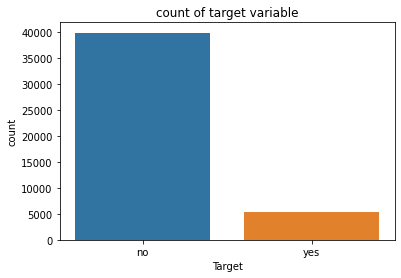

In [ ]:
sns.countplot(x=df.y,data=df)
plt.xlabel("Target")
plt.title("count of target variable")
plt.plot()

In [ ]:
df["prev_outcome"].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
df[df["prev_outcome"]=="success"].y.value_counts()

yes    978
no     533
Name: y, dtype: int64

In [ ]:
df[df["prev_outcome"]=="failure"].y.value_counts()

no     4283
yes     618
Name: y, dtype: int64

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# values=["success","failure","other"]
# for i in values:
#   print("% of +ve conversation if prev_outcome",i,len(df[df["prev_outcome"]==i][df["y"]=="yes"])/len(df[df["prev_outcome"]=="success"])
#   print("over all yes % if prev_outcome",i,len(df[df["prev_outcome"]==i][df["y"]=="yes"])/len(df[df["y"]=="yes"]))

encoding for target variable

In [ ]:
df["Target"]=df["y"].map({'yes': 1, 'no': 0})

# eda

In [ ]:
df.groupby("prev_outcome")["Target"].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: Target, dtype: float64

In [ ]:
df.groupby("marital")["Target"].mean()

marital
divorced    0.119455
married     0.101250
single      0.149515
Name: Target, dtype: float64

In [ ]:
df.groupby("education_qual")["Target"].mean()

education_qual
primary      0.086277
secondary    0.107838
tertiary     0.150086
Name: Target, dtype: float64

In [ ]:
df.groupby("job")["Target"].mean()

job
admin.           0.122050
blue-collar      0.074067
entrepreneur     0.082717
housemaid        0.087903
management       0.137570
retired          0.227915
self-employed    0.118429
services         0.088851
student          0.286780
technician       0.110585
unemployed       0.155027
Name: Target, dtype: float64

In [ ]:
df.groupby("mon")["Target"].mean()

mon
apr    0.196794
aug    0.110168
dec    0.467290
feb    0.166478
jan    0.101212
jul    0.090949
jun    0.102266
mar    0.519916
may    0.067199
nov    0.101511
oct    0.437669
sep    0.464594
Name: Target, dtype: float64

In [ ]:
df.groupby("call_type")["Target"].mean()

call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: Target, dtype: float64

distribution of feature

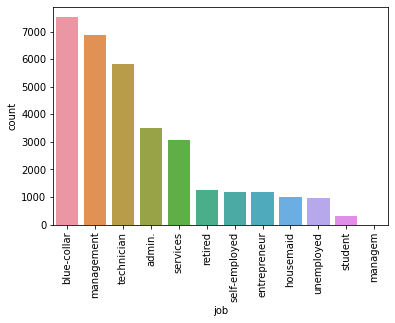

In [ ]:
df_eda=pd.DataFrame(df.job.value_counts()).sort_values("job", ascending=False).reset_index()
df_eda.rename(columns={"index":"job","job":"count"},inplace=True)
bar=sns.barplot(x=df_eda["job"],y=df_eda["count"],data=df_eda)
bar.tick_params(axis="x",rotation=90)

<AxesSubplot:ylabel='job'>

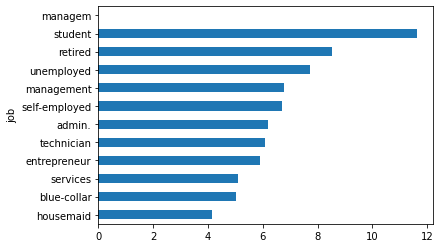

In [ ]:
(df.groupby("job")["Target"].mean()*100).sort_values().plot(kind="barh")

In [ ]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student', 'managem'], dtype=object)

<AxesSubplot:ylabel='education_qual'>

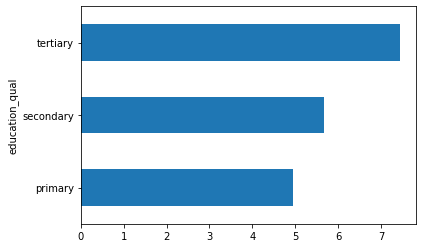

In [ ]:
(df.groupby("education_qual")["Target"].mean()*100).sort_values().plot(kind="barh")

In [ ]:
df["education_qual"].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

<AxesSubplot:ylabel='marital'>

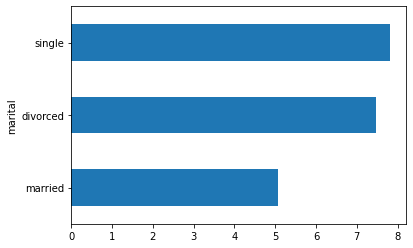

In [ ]:
(df.groupby("marital")["Target"].mean()*100).sort_values().plot(kind="barh")

In [ ]:
df["marital"].unique()

array(['married', 'single', 'divorced', nan], dtype=object)

<AxesSubplot:ylabel='call_type'>

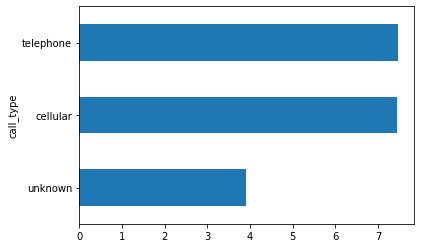

In [ ]:
(df.groupby("call_type")["Target"].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='mon'>

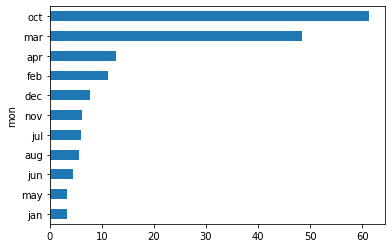

In [ ]:
(df.groupby("mon")["Target"].mean()*100).sort_values().plot(kind="barh")

In [ ]:
df["mon"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', nan], dtype=object)

<AxesSubplot:ylabel='marital'>

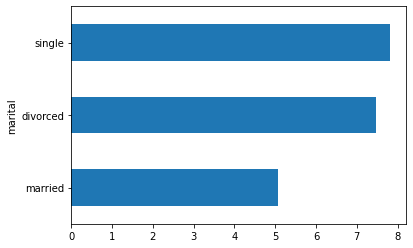

In [ ]:
(df.groupby("marital")["Target"].mean()*100).sort_values().plot(kind="barh")

In [ ]:
df["prev_outcome"].unique()

array(['unknown', 'failure', 'other', 'success', nan], dtype=object)

<AxesSubplot:ylabel='prev_outcome'>

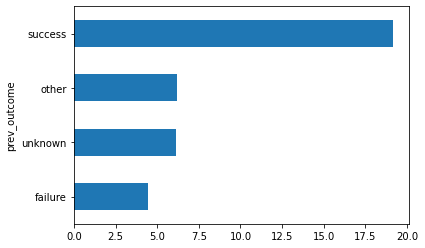

In [ ]:
(df.groupby("prev_outcome")["Target"].mean()*100).sort_values().plot(kind="barh")

continuous features

<AxesSubplot:ylabel='day'>

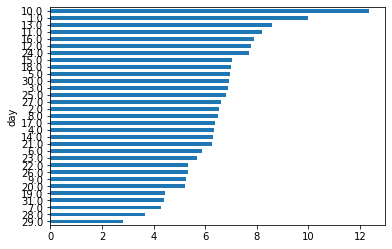

In [ ]:
(df.groupby("day")["Target"].mean()*100).sort_values().plot(kind="barh")

In [ ]:
df["day"].unique()

array([ 5.,  6.,  7.,  8.,  9., 12., 13., 14., 15., 16., 19., 20., 21.,
       23., 26., 27., 28., 29., 30.,  2.,  3.,  4., 11., 17., 18., 24.,
       25.,  1., 10., 22., 31., nan])

<AxesSubplot:ylabel='age'>

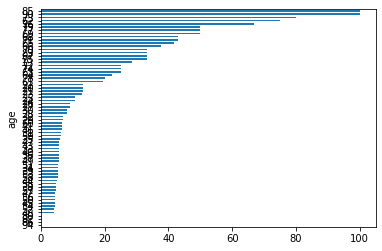

In [ ]:
(df.groupby("age")["Target"].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:xlabel='y', ylabel='day'>

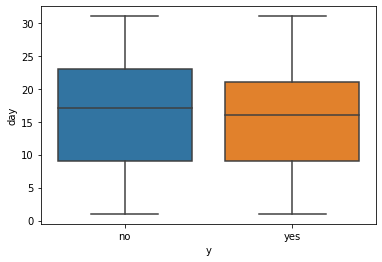

In [ ]:
sns.boxplot(x='y',y='day',data=df)

In [ ]:
df["age"]

0        58
1        44
2        33
3        47
4        33
         ..
32768    30
32769    39
32770    29
32771    39
32772    32
Name: age, Length: 32767, dtype: int64

In [ ]:
df["y"]

0         no
1         no
2         no
3         no
4         no
        ... 
32768     no
32769     no
32770    yes
32771     no
32772    NaN
Name: y, Length: 32767, dtype: object

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'Target'],
      dtype='object')

<AxesSubplot:xlabel='y', ylabel='age'>

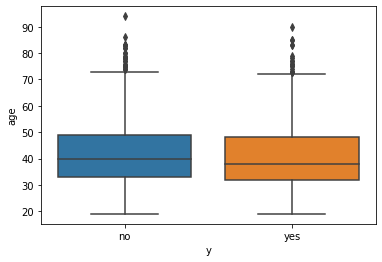

In [ ]:
sns.boxplot(x='y',y='age',data=df)

<AxesSubplot:xlabel='y', ylabel='dur'>

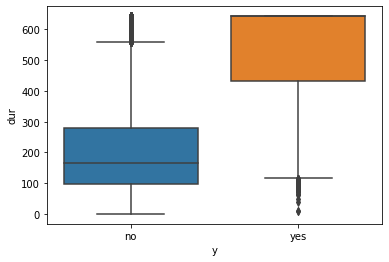

In [ ]:
sns.boxplot(x='y',y='dur',data=df)

<AxesSubplot:xlabel='y', ylabel='num_calls'>

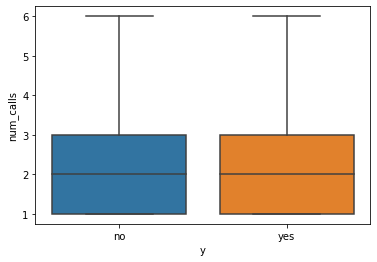

In [ ]:
sns.boxplot(x='y',y='num_calls',data=df)

In [ ]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,Target
0,58,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no,0.0
1,44,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no,0.0
2,33,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no,0.0
3,47,blue-collar,married,secondary,unknown,5.0,may,92.0,1.0,unknown,no,0.0
4,33,blue-collar,single,secondary,unknown,5.0,may,198.0,1.0,unknown,no,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32768,30,blue-collar,married,secondary,cellular,17.0,apr,191.0,1.0,failure,no,0.0
32769,39,blue-collar,married,primary,cellular,17.0,apr,206.0,1.0,unknown,no,0.0
32770,29,technician,married,secondary,cellular,17.0,apr,367.0,3.0,failure,yes,1.0
32771,39,management,married,secondary,telephone,17.0,apr,141.0,4.0,unknown,no,0.0


In [ ]:
df=df.drop(["y"],axis=1)

#Encoding

In [ ]:
# encoding
df["job"]=df.job.map({'blue-collar': 1, 'entrepreneur': 2,'housemaid': 3,'services': 4,'technician': 5,'self-employed': 6,'admin.': 7,'management': 8,'unemployed': 9,'retired': 10,'student': 11})


In [ ]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Target
0,58,8.0,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,0.0
1,44,5.0,single,secondary,unknown,5.0,may,151.0,1.0,unknown,0.0
2,33,2.0,married,secondary,unknown,5.0,may,76.0,1.0,unknown,0.0
3,47,1.0,married,secondary,unknown,5.0,may,92.0,1.0,unknown,0.0
4,33,1.0,single,secondary,unknown,5.0,may,198.0,1.0,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32768,30,1.0,married,secondary,cellular,17.0,apr,191.0,1.0,failure,0.0
32769,39,1.0,married,primary,cellular,17.0,apr,206.0,1.0,unknown,0.0
32770,29,5.0,married,secondary,cellular,17.0,apr,367.0,3.0,failure,1.0
32771,39,8.0,married,secondary,telephone,17.0,apr,141.0,4.0,unknown,0.0


In [ ]:
df["job"].unique()

array([ 8.,  5.,  2.,  1., 10.,  7.,  4.,  6.,  9.,  3., 11., nan])

In [ ]:
df["education_qual"]=df["education_qual"].map({'primary': 1, 'secondary': 2,'tertiary': 3})

In [ ]:
df["education_qual"].unique()

array([3, 2, 1])

In [ ]:
df["marital"]=df["marital"].map({'married': 1, 'divorced': 2,'single': 3})

In [ ]:
df["marital"].unique()

array([ 1.,  3.,  2., nan])

In [ ]:
df["call_type"]=df["call_type"].map({'unknown': 1, 'telephone': 2,'cellular': 3})

In [ ]:
df["call_type"].unique()

array([ 1.,  3.,  2., nan])

In [ ]:
df["mon"]=df.mon.map({'may': 1, 'jul': 2,'jan': 3,'nov': 4,'jun': 5,'aug': 6,'feb': 7,'apr': 8,'oct': 9,'sep': 10,'dec': 11,'mar': 12})


In [ ]:
df["mon"].unique()

array([ 1.,  5.,  2.,  6.,  9.,  4., 11.,  3.,  7., 12.,  8., nan])

In [ ]:
df["prev_outcome"]=df["prev_outcome"].map({'unknown': 1, 'failure': 2,'other': 3,'success': 4})

In [ ]:
df["prev_outcome"].unique()

array([ 1.,  2.,  3.,  4., nan])

In [ ]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Target
0,58,8.0,1.0,3,1.0,5.0,1.0,261.0,1.0,1.0,0.0
1,44,5.0,3.0,2,1.0,5.0,1.0,151.0,1.0,1.0,0.0
2,33,2.0,1.0,2,1.0,5.0,1.0,76.0,1.0,1.0,0.0
3,47,1.0,1.0,2,1.0,5.0,1.0,92.0,1.0,1.0,0.0
4,33,1.0,3.0,2,1.0,5.0,1.0,198.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32768,30,1.0,1.0,2,3.0,17.0,8.0,191.0,1.0,2.0,0.0
32769,39,1.0,1.0,1,3.0,17.0,8.0,206.0,1.0,1.0,0.0
32770,29,5.0,1.0,2,3.0,17.0,8.0,367.0,3.0,2.0,1.0
32771,39,8.0,1.0,2,2.0,17.0,8.0,141.0,4.0,1.0,0.0


In [ ]:
# df=df.drop(["y"],axis=1)

# splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X =  df.loc[:,['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon','dur', 'num_calls', 'prev_outcome']].values
y = df.loc[:,'Target'].values


In [ ]:
df.Target.value_counts()

0.0    30781
1.0     1985
Name: Target, dtype: int64

In [ ]:
# X = df[['age', 'job', 'marital','education_qual', 'call_type', 'day', 'mon','dur', 'num_calls', 'prev_outcome']]
# y = df['Target']# target
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
     

In [ ]:
df.shape

(32767, 11)

# SMOTEENN to balance the imbalance data

In [ ]:
from imblearn.combine import SMOTEENN
smt=SMOTEENN(sampling_strategy="all")
X_smt,y_smt=smt.fit_resample(X,y)

ValueError: ignored

In [ ]:
X_smt.shape

In [ ]:
y_smt.shape

In [ ]:
df.Target.value_counts()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Model

In [ ]:
import matplotlib.pyplot as plt 

# **LogisticRegression**

In [ ]:
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # initialise the model, ready to be used
log_reg.fit(X_smt,y_smt)
# log_reg.score(X_train_scaled,y_test)

In [ ]:
y_pred_lg=log_reg.predict(X_test)

In [ ]:
log_auc_roc_score=roc_auc_score(y_test,y_pred_lg)
log_auc_roc_score

# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_smt,y_smt)

In [ ]:
y_pred_KNN=KNN.predict(X_test)

In [ ]:
KNN_auc_roc_score=roc_auc_score(y_test,y_pred_KNN)
KNN_auc_roc_score

# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_smt,y_smt)

y_pred_dt = dt.predict(X_test)
y_pred_dt

In [ ]:
score=roc_auc_score(y_test,y_pred_dt)
score

In [ ]:
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
# import numpy as np

# for depth in [1,2,3,4,5,6,7,8,9,10,20]:
#   dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
#   # Fit dt to the training set
#   dt.fit(X_train, y_train) # the model is trained
#   trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
#   dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
#   valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
#   print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

In [ ]:
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  dt.fit(X_smt,y_smt)
  trainAccuracy = accuracy_score(y_test,dt.predict(X_smt))
  dt = DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt,X_smt,y_smt, cv=10)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

In [ ]:
y_pred_dt=dt.predict(X_test)

In [ ]:
score=roc_auc_score(y_test,y_pred_dt)
score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_depth=5,max_features="sqrt")
rf.fit(X_smt,y_smt)

In [ ]:
y_pred_rf=rf.predict(X_test)

In [ ]:
rf_auc_roc_score=roc_auc_score(y_test,y_pred_rf)
rf_auc_roc_score

# voting_classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
m1=LogisticRegression()
m2=KNeighborsClassifier(n_neighbors=3)
m3=DecisionTreeClassifier()
m4=RandomForestClassifier(n_estimators=100,max_depth=5,max_features="sqrt")
m5=XGBClassifier(learning_rate=0.5,n_estimators=100,verbosity=0)

In [ ]:
voting_classifier=VotingClassifier(estimators=[("lr",m1),("dt",m2),("KNN",m3),("xgb",m4),("rf",m5)],voting="soft")
voting_classifier.fit(X_smt,y_smt)
y_pred=voting_classifier.predict(X_test)
voting_classifier_auc_roc_score=roc_auc_score(y_test,y_pred)
voting_classifier_auc_roc_score

XGBOOST

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate=0.5,n_estimators=100,verbosity=0)
xg.fit(X_smt,y_smt)
test_pred = xg.predict(X_test)
XG_auc_roc_score = roc_auc_score(y_test, test_pred)
print("Performance of auroc test : ", XG_auc_roc_score)

In [ ]:
result=pd.DataFrame({"MODEL_RESULTS":["LogisticRegression","KNN","DecisionTree","RandomForest","XGBClassifier"],"AUROC_VALUES":[log_auc_roc_score,KNN_auc_roc_score,roc_auc_score_dt,rf_auc_roc_score,XG_auc_roc_score]})

In [ ]:
result

# feature importance

In [ ]:
xg.fit(X_smt,y_smt)
importance = xg.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
list(zip(importance,df.columns))

from the above top important features are:

1.call_type column has tha high importance

2.prev_outcome

3.dur

4.mon



Thus XGBoost gives the highest roc_auc_score

conclusion most of the insurance are claimed based on the call types through commmunication via phones ,prev_outcome, on may mon,based on duration of the call.